# Liver Disease Prediction

In [1]:
# for numerical computing
import numpy as np

# for dataframes
import pandas as pd

# for easier visualization
import seaborn as sns

# for visualization and to display plots
from matplotlib import pyplot as plt
%matplotlib inline

# import color maps
from matplotlib.colors import ListedColormap

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

from math import sqrt

# to split train and test set
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# to perform hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import cross_val_score

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score
#import xgboost
import os
# mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-7.2.0-posix-seh-rt_v5-rev0\\mingw64\\bin'
# os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']
from xgboost import XGBClassifier
from xgboost import plot_importance  # to plot feature importance

import joblib
sns.set()
plt.style.use('ggplot')
%matplotlib inline

In [4]:
df=pd.read_csv('liver.csv')

In [5]:
df.shape

(1166, 11)

In [6]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [7]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


## Exploratory Data Analysis

Filtering categorical data

In [8]:
df.dtypes[df.dtypes=='object']

Gender    object
dtype: object

## Distribution of Numerical Features

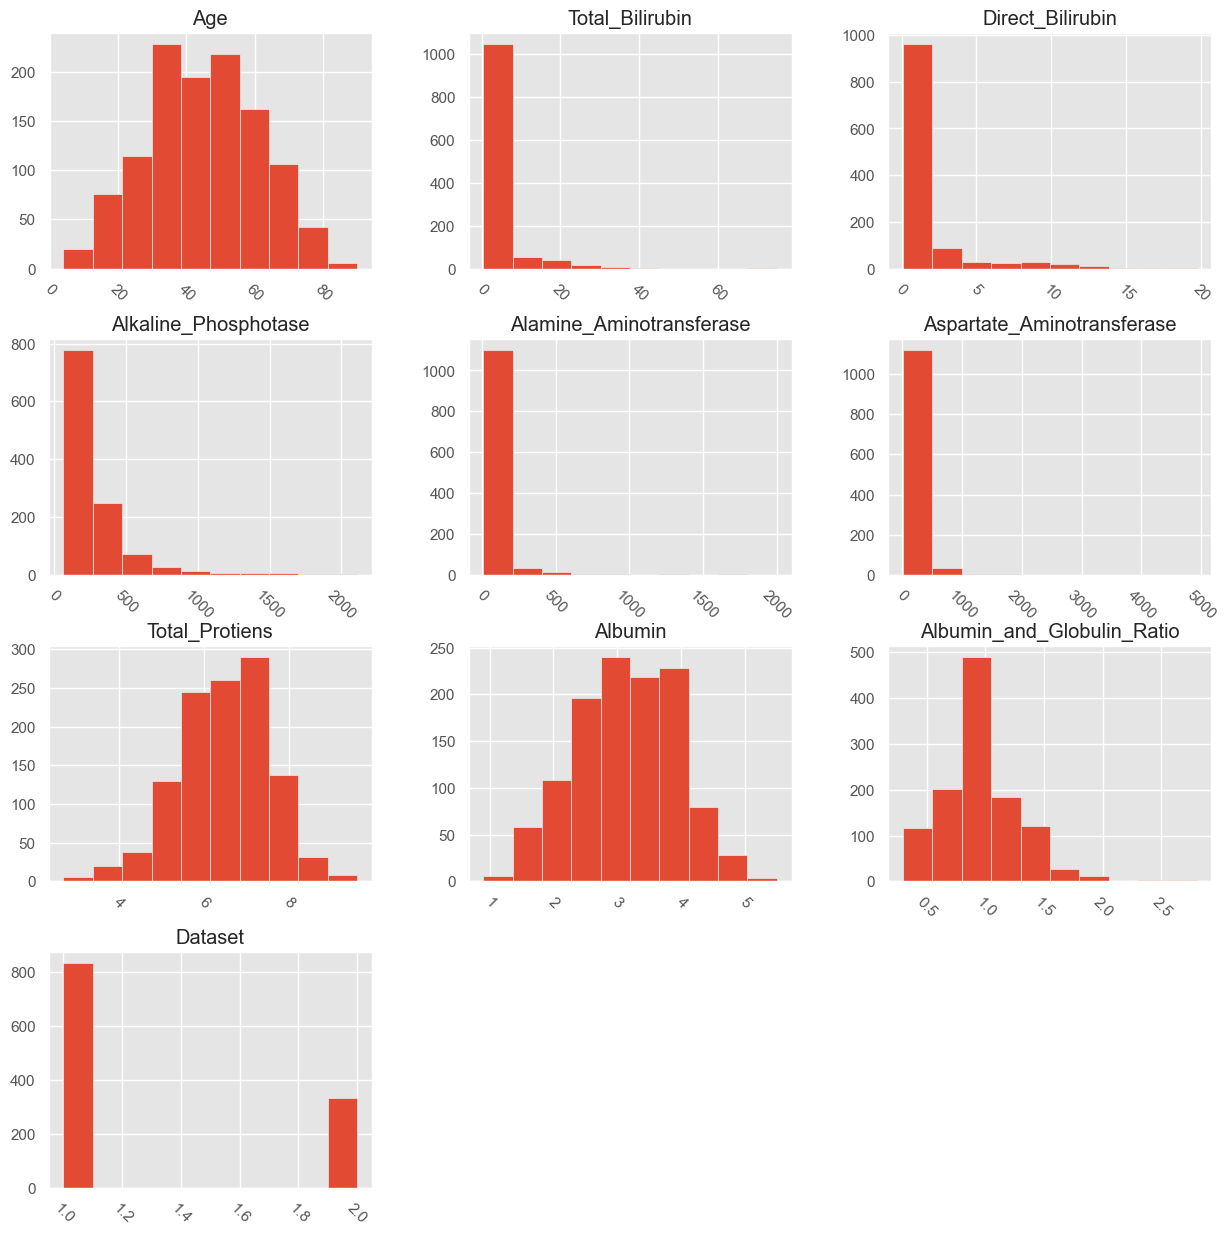

In [9]:
# Plot histogram grid
df.hist(figsize=(15,15), xrot=-45, bins=10) ## Display the labels rotated by 45 degress

# Clear the text "residue"
plt.show()

In [10]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1158.000000,1166.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.182883,6.206856,2.807292,242.833702,182.541961,288.794503,1.084986,0.795177,0.319454,0.452296
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.250000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.750000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


It seems there is outlier in Aspartate_Aminotransferase as the max value is very high than mean value

Dataset i.e output value has '1' for liver disease and '2' for no liver disease so let's make it 0 for no disease to make it convinient

In [11]:
## if score==negative, mark 0 ;else 1 
def partition(x):
    if x == 2:
        return 0
    return 1

df['Dataset'] = df['Dataset'].map(partition)

## Distribution of categorical data

In [12]:
df.describe(include=['object'])

,Gender
count,1166
unique,2
top,Male
freq,882


## Bar plots for categorical Features

<Axes: xlabel='count', ylabel='Gender'>

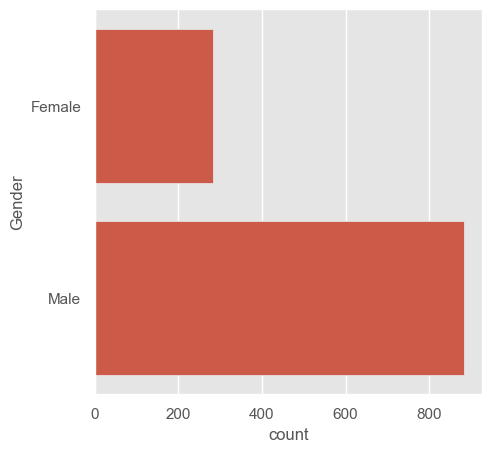

In [13]:
plt.figure(figsize=(5,5))
sns.countplot(y='Gender', data=df)

In [14]:
df[df['Gender'] == 'Male'][['Dataset', 'Gender']].head()

,Dataset,Gender
1,1,Male
2,1,Male
3,1,Male
4,1,Male
5,1,Male


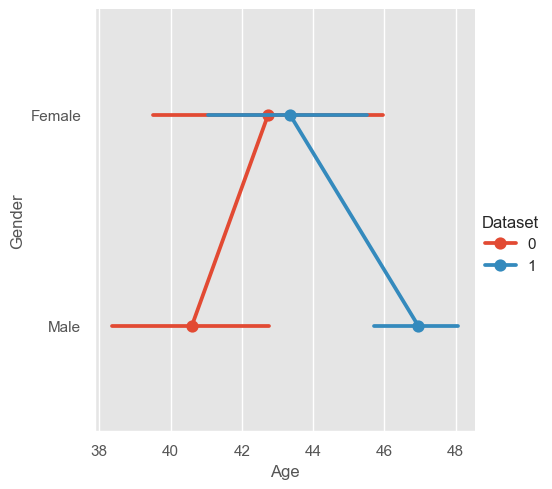

In [16]:
sns.catplot(x="Age", y="Gender", hue="Dataset", data=df, kind="point")


Age seems to be a factor for liver disease for both male and female genders

Number of patients that are male:  882
Number of patients that are female:  284


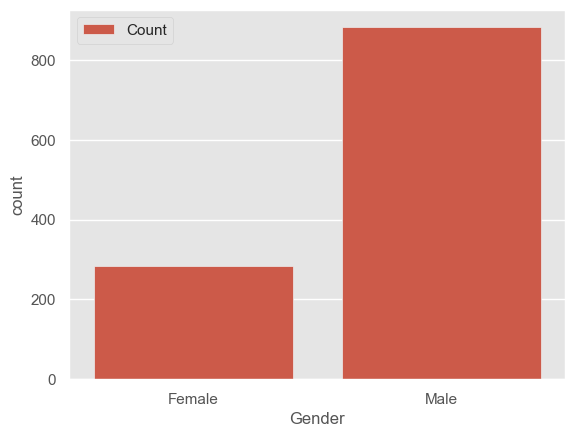

In [17]:
sns.countplot(data=df, x = 'Gender', label='Count')

M, F = df['Gender'].value_counts()
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)

There are more male patients than female patients

Label Male as 0 and Female as 1

In [22]:
## if score==negative, mark 0 ;else 1 
def partition(x):
    if x =='Male':
        return 0
    return 1

df['Gender'] = df['Gender'].map(partition)

#### 2-D Scatter Plot

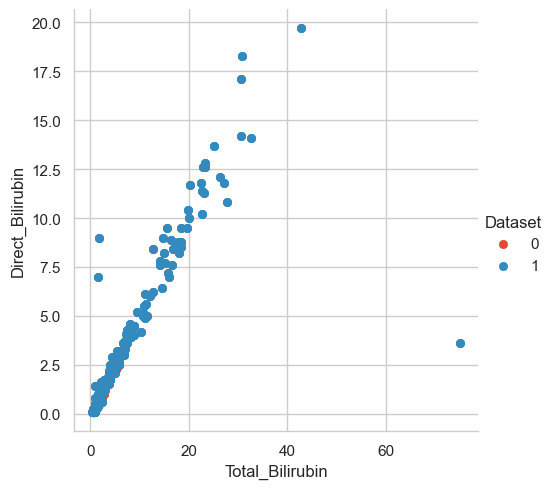

In [24]:
sns.set_style('whitegrid')   ## Background Grid
sns.FacetGrid(df, hue='Dataset', height=5).map(plt.scatter, 'Total_Bilirubin', 'Direct_Bilirubin').add_legend()


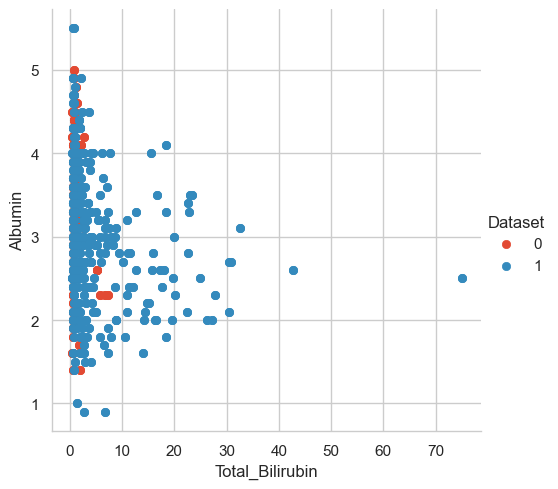

In [25]:
sns.set_style('whitegrid')  # Background Grid
sns.FacetGrid(df, hue='Dataset', height=5).map(plt.scatter, 'Total_Bilirubin', 'Albumin').add_legend()


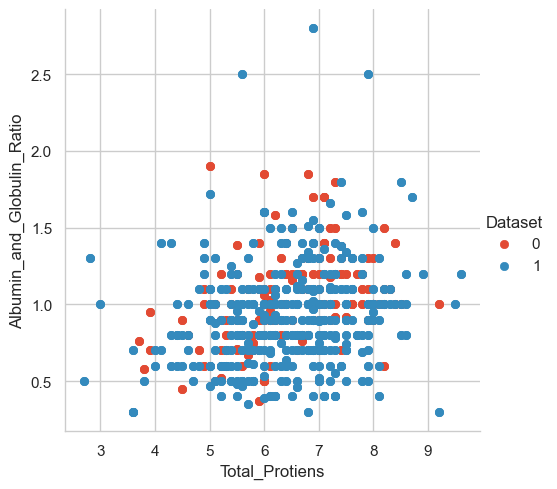

In [26]:
sns.set_style('whitegrid')  # Background Grid
sns.FacetGrid(df, hue='Dataset', height=5).map(plt.scatter, 'Total_Protiens', 'Albumin_and_Globulin_Ratio').add_legend()


## Correlations
* Finally, let's take a look at the relationships between numeric features and other numeric features.
* ***Correlation*** is a value between -1 and 1 that represents how closely values for two separate features move in unison.
* Positive correlation means that as one feature increases, the other increases; eg. a child's age and her height.
* Negative correlation means that as one feature increases, the other decreases; eg. hours spent studying and number of parties attended.
* Correlations near -1 or 1 indicate a strong relationship.
* Those closer to 0 indicate a weak relationship.
* 0 indicates no relationship.

In [27]:
df.corr()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,NaN,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408,0.137351
Gender,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total_Bilirubin,0.011763,NaN,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267,0.220208
Direct_Bilirubin,0.007529,NaN,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,0.246046
Alkaline_Phosphotase,0.080425,NaN,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,0.184866
Alamine_Aminotransferase,-0.086883,NaN,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,0.163416
Aspartate_Aminotransferase,-0.019910,NaN,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,0.151934
Total_Protiens,-0.187461,NaN,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887,-0.035008
Albumin,-0.265924,NaN,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,-0.161388
Albumin_and_Globulin_Ratio,-0.216408,NaN,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,-0.163131


<Axes: >

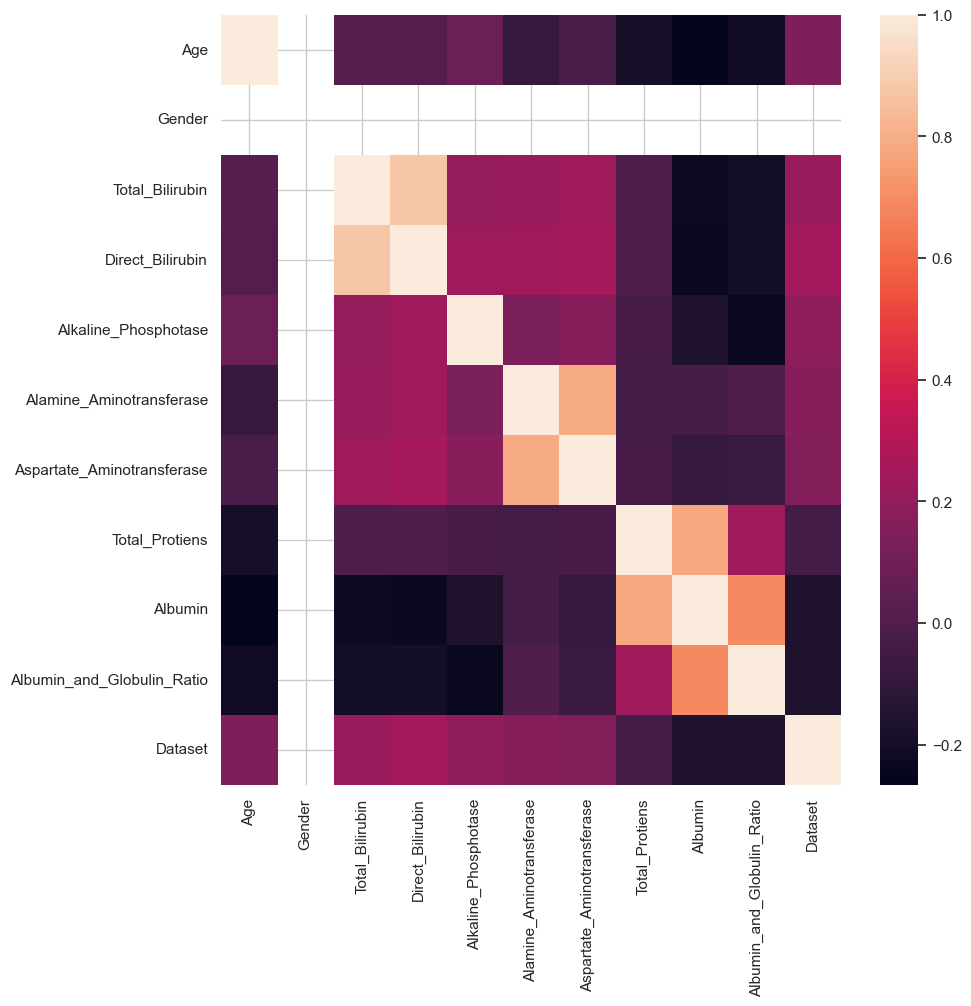

In [28]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

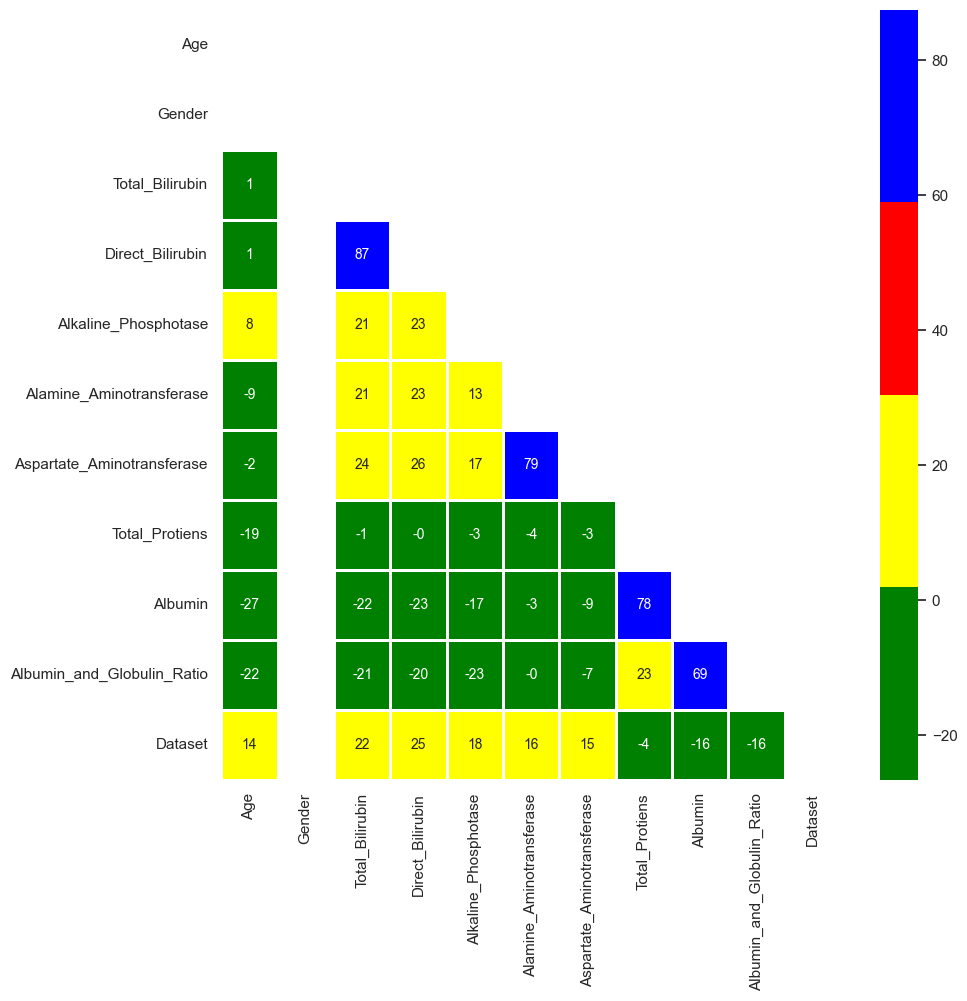

In [29]:
mask=np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,10))
with sns.axes_style("white"):
    ax = sns.heatmap(df.corr()*100, mask=mask, fmt='.0f', annot=True, lw=1, cmap=ListedColormap(['green', 'yellow', 'red','blue']))

## Data Cleaning

In [30]:
df = df.drop_duplicates()
print( df.shape )

(570, 11)


There were 13 duplicates

## Removing Outliers

<Axes: ylabel='Aspartate_Aminotransferase'>

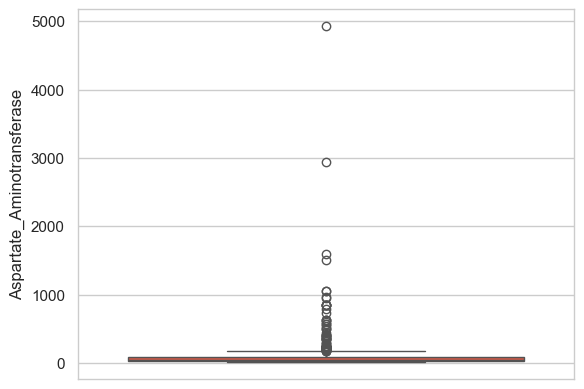

In [31]:
sns.boxplot(df.Aspartate_Aminotransferase)

In [32]:
df.Aspartate_Aminotransferase.sort_values(ascending=False).head()

135    4929
117    2946
118    1600
207    1500
119    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [33]:
df = df[df.Aspartate_Aminotransferase <=3000 ]
df.shape

(569, 11)

<Axes: ylabel='Aspartate_Aminotransferase'>

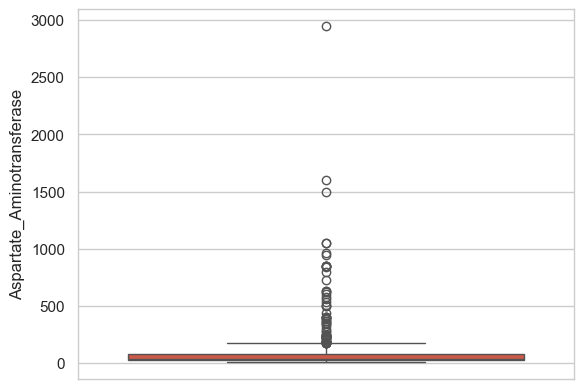

In [34]:
sns.boxplot(df.Aspartate_Aminotransferase)

In [35]:
df.Aspartate_Aminotransferase.sort_values(ascending=False).head()

117    2946
118    1600
207    1500
199    1050
119    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [36]:
df = df[df.Aspartate_Aminotransferase <=2500 ]
df.shape

(568, 11)

In [37]:
df.isnull().values.any()

np.True_

In [38]:
df=df.dropna(how='any')  

In [39]:
df.shape

(564, 11)

In [40]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


## Machine Learning Models

### Data Preparation

In [41]:
# Create separate object for target variable
y = df.Dataset

# Create separate object for input features
X = df.drop('Dataset', axis=1)

In [42]:
# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=0,
                                                    stratify=df.Dataset)

In [43]:
# Print number of observations in X_train, X_test, y_train, and y_test
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(394, 10) (170, 10) (394,) (170,)


### Data standardization

In [44]:
train_mean = X_train.mean()
train_std = X_train.std()

In [45]:
## Standardize the train data set
X_train = (X_train - train_mean) / train_std

In [46]:
## Check for mean and std dev.
X_train.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,3.940000e+02,0.0,394.000000,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02
mean,-1.848493e-16,NaN,0.000000,3.606816e-17,-6.311928e-17,4.508520e-18,2.028834e-17,2.930538e-16,1.284928e-16,-3.606816e-17
std,1.000000e+00,NaN,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.609772e+00,NaN,-0.457097,-4.967282e-01,-9.478507e-01,-3.999413e-01,-4.728145e-01,-3.285639e+00,-2.750957e+00,-2.057111e+00
25%,-7.944028e-01,NaN,-0.396929,-4.623568e-01,-4.750931e-01,-3.207875e-01,-3.922670e-01,-7.312226e-01,-7.405196e-01,-7.644963e-01
50%,1.938343e-02,NaN,-0.366846,-4.279853e-01,-3.294669e-01,-2.477225e-01,-3.059663e-01,-1.389277e-03,-1.122579e-01,7.570326e-02
75%,7.705707e-01,NaN,-0.111134,-8.427106e-02,4.409605e-02,-9.702594e-02,-7.583080e-02,6.372149e-01,7.673084e-01,5.281184e-01
max,2.460742e+00,NaN,10.764128,6.240071e+00,7.692639e+00,9.768272e+00,8.669316e+00,2.826715e+00,2.400789e+00,5.052270e+00


In [47]:
## Note: We use train_mean and train_std_dev to standardize test data set
X_test = (X_test - train_mean) / train_std

In [48]:
## Check for mean and std dev. - not exactly 0 and 1
X_test.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,170.000000,0.0,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,-0.169886,NaN,-0.065212,-0.062637,0.052364,-0.020612,0.059915,0.284104,0.238829,0.124366
std,1.053615,NaN,0.800553,0.912979,1.097240,0.818079,0.976194,0.950912,0.985593,1.100236
min,-2.484574,NaN,-0.442055,-0.496728,-0.833882,-0.393853,-0.478568,-3.376868,-2.750957,-2.057111
25%,-0.857002,NaN,-0.396929,-0.462357,-0.457154,-0.320788,-0.386514,-0.275077,-0.363563,-0.489816
50%,-0.074515,NaN,-0.381888,-0.427985,-0.346351,-0.247723,-0.294459,0.454757,0.264699,-0.118189
75%,0.582774,NaN,-0.216427,-0.170200,0.044096,-0.090937,-0.006790,0.819673,1.018613,0.770484
max,2.773737,NaN,3.649330,3.868443,6.173061,7.150109,5.504954,2.917944,3.029050,6.021731


# LR

In [54]:
# # fitting data to model

# from sklearn.linear_model import LogisticRegression

# lr = LogisticRegression()
# lr.fit(X_train, y_train)

# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Example: Splitting your data into train and test sets (if not already done)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Use 'mean' to replace NaN with column mean
X_train_imputed = imputer.fit_transform(X_train)

# Initialize Logistic Regression
lr = LogisticRegression()

# Fit the model to the imputed data
lr.fit(X_train_imputed, y_train)

# If you need to transform the test data and make predictions
X_test_imputed = imputer.transform(X_test)
predictions = lr.predict(X_test_imputed)

y_pred = lr.predict(X_test_imputed)

# Evaluate the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 72.94%


In [56]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming you already have X and y defined, if not, define them here
# Example data split (if not done already)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the imputer to handle missing values
imputer = SimpleImputer(strategy='mean')  # Use 'mean' to fill NaNs with the column means

# Fit the imputer on the training data and transform both the training and test data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train Logistic Regression model
lr = LogisticRegression()
lr.fit(X_train_imputed, y_train)

# Make predictions and calculate accuracy on the training set
train_predictions = lr.predict(X_train_imputed)
train_accuracy = accuracy_score(y_train, train_predictions)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

# Make predictions and calculate accuracy on the test set
test_predictions = lr.predict(X_test_imputed)
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Training Accuracy: 72.84%
Test Accuracy: 72.94%


In [57]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[ 16  33]
 [ 13 108]]


In [58]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.33      0.41        49
           1       0.77      0.89      0.82       121

    accuracy                           0.73       170
   macro avg       0.66      0.61      0.62       170
weighted avg       0.70      0.73      0.71       170



# KNN

In [60]:
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Example: assuming you already have X and y defined
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the imputer to handle missing values by replacing NaNs with the column mean
imputer = SimpleImputer(strategy='mean')  # You can also use 'median' or 'most_frequent' based on the data

# Fit the imputer on the training data and transform both the training and test data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train the KNeighborsClassifier model
knn = KNeighborsClassifier()
knn.fit(X_train_imputed, y_train)

# Make predictions and calculate accuracy on the training set
train_predictions = knn.predict(X_train_imputed)
train_accuracy = accuracy_score(y_train, train_predictions)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

# Make predictions and calculate accuracy on the test set
test_predictions = knn.predict(X_test_imputed)
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Training Accuracy: 79.19%
Test Accuracy: 68.24%


In [62]:
# # model predictions 

# y_pred = knn.predict(X_test)

y_pred = knn.predict(X_test_imputed)

In [64]:
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize the KNNImputer to handle missing values
imputer = KNNImputer(n_neighbors=5)  # 'n_neighbors' can be adjusted

# Fit the imputer on training data and transform both training and test data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train the KNeighborsClassifier on the imputed training data
knn = KNeighborsClassifier()
knn.fit(X_train_imputed, y_train)

# Model predictions
y_pred = knn.predict(X_test_imputed)

# Accuracy score
print(accuracy_score(y_train, knn.predict(X_train_imputed)))
knn_acc = accuracy_score(y_test, y_pred)
print(knn_acc)


0.7918781725888325
0.6823529411764706


In [65]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[22 27]
 [27 94]]


In [66]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.45      0.45      0.45        49
           1       0.78      0.78      0.78       121

    accuracy                           0.68       170
   macro avg       0.61      0.61      0.61       170
weighted avg       0.68      0.68      0.68       170



# SVM

In [69]:
from sklearn.impute import KNNImputer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Initialize the KNNImputer to handle missing values
imputer = KNNImputer(n_neighbors=5)  # 'n_neighbors' can be adjusted

# Fit the imputer on the training data and transform both training and test data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize the SVC model
svc = SVC(probability=True)

# Define the hyperparameters to search over
parameters = {
    'gamma': [0.0001, 0.001, 0.01, 0.1],
    'C': [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20]
}

# Initialize GridSearchCV with the SVC model and parameters
grid_search = GridSearchCV(svc, parameters)

# Fit the model on the imputed data
grid_search.fit(X_train_imputed, y_train)

# You can now access the best parameters and scores
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Best parameters: {'C': 15, 'gamma': 0.01}
Best score: 0.7234014930217463


In [70]:
# best parameters

grid_search.best_params_

{'C': 15, 'gamma': 0.01}

In [71]:
# best score 

grid_search.best_score_

np.float64(0.7234014930217463)

In [73]:
from sklearn.impute import KNNImputer
from sklearn.svm import SVC

# Initialize the KNNImputer to handle missing values
imputer = KNNImputer(n_neighbors=5)  # You can adjust the 'n_neighbors' parameter

# Apply imputer on training and testing data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Now initialize and fit the SVC model with the best parameters (C=0.01, gamma=0.0001)
svc = SVC(C=0.01, gamma=0.0001, probability=True)
svc.fit(X_train_imputed, y_train)

# After fitting, you can make predictions
y_pred = svc.predict(X_test_imputed)

# Optionally, print the accuracy or any other metric
from sklearn.metrics import accuracy_score
print("Accuracy on test set:", accuracy_score(y_test, y_pred))


Accuracy on test set: 0.711764705882353


In [75]:
# Model predictions
y_pred = svc.predict(X_test_imputed)

# Optionally, print the predictions or check performance
print("Predictions:", y_pred)

# You can also calculate accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", accuracy)


Predictions: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Accuracy on test set: 0.711764705882353


In [79]:
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# 1. Handle missing values using imputation (replacing NaN with the mean of each column)
imputer = SimpleImputer(strategy='mean')

# Apply imputation to the training and test sets
X_train_imputed = imputer.fit_transform(X_train)  # Fit on training data and transform it
X_test_imputed = imputer.transform(X_test)  # Use the same imputer to transform the test data

# 2. Initialize and fit the SVC model with the imputed data
svc = SVC(C=0.01, gamma=0.0001, probability=True)
svc.fit(X_train_imputed, y_train)

# 3. Accuracy score for training set
train_accuracy = accuracy_score(y_train, svc.predict(X_train_imputed))
print("Training Accuracy:", train_accuracy)

# 4. Accuracy score for test set
test_accuracy = accuracy_score(y_test, svc.predict(X_test_imputed))
print("Test Accuracy:", test_accuracy)


Training Accuracy: 0.7131979695431472
Test Accuracy: 0.711764705882353


In [80]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[  0  49]
 [  0 121]]


In [81]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        49
           1       0.71      1.00      0.83       121

    accuracy                           0.71       170
   macro avg       0.36      0.50      0.42       170
weighted avg       0.51      0.71      0.59       170



# DT

In [82]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 0.6176470588235294 

Confusion Matrix :- 
[[25 24]
 [41 80]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.38      0.51      0.43        49
           1       0.77      0.66      0.71       121

    accuracy                           0.62       170
   macro avg       0.57      0.59      0.57       170
weighted avg       0.66      0.62      0.63       170



In [83]:
# hyper parameter tuning of decision tree 

from sklearn.model_selection import GridSearchCV
grid_param = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [1, 2, 3, 5, 7],
    'min_samples_split' : [1, 2, 3, 5, 7],
    'max_features' : ['auto', 'sqrt', 'log2']
}

grid_search_dtc = GridSearchCV(dtc, grid_param, cv = 24, n_jobs = -1, verbose = 1)
grid_search_dtc.fit(X_train, y_train)

Fitting 24 folds for each of 1200 candidates, totalling 28800 fits


GridSearchCV(cv=24, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [84]:
# best parameters and best score

print(grid_search_dtc.best_params_)
print(grid_search_dtc.best_score_)

{'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 7, 'splitter': 'random'}
0.7386642156862745


In [85]:
# best estimator

dtc = grid_search_dtc.best_estimator_

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 0.7157360406091371
Test Accuracy of Decision Tree Classifier is 0.711764705882353 

Confusion Matrix :- 
[[  0  49]
 [  0 121]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        49
           1       0.71      1.00      0.83       121

    accuracy                           0.71       170
   macro avg       0.36      0.50      0.42       170
weighted avg       0.51      0.71      0.59       170



# RF

In [87]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 16, max_features = 'sqrt', min_samples_leaf = 4, min_samples_split = 2, n_estimators = 130)
rand_clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=16, min_samples_leaf=4,
                       n_estimators=130)

In [88]:
y_pred = rand_clf.predict(X_test)

In [89]:
# accuracy score

print(accuracy_score(y_train, rand_clf.predict(X_train)))

ran_clf_acc = accuracy_score(y_test, y_pred)
print(ran_clf_acc)

0.9390862944162437
0.6764705882352942


In [90]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[20 29]
 [26 95]]


In [91]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.43      0.41      0.42        49
           1       0.77      0.79      0.78       121

    accuracy                           0.68       170
   macro avg       0.60      0.60      0.60       170
weighted avg       0.67      0.68      0.67       170



# Gradient Boosting Classifier

In [93]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Create a pipeline with imputation and the GradientBoostingClassifier
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Replace NaN values with the mean of each column
    ('gbc', GradientBoostingClassifier())  # GradientBoostingClassifier
])

# Define hyperparameters for grid search
parameters = {
    'gbc__loss': ['log_loss', 'exponential'],  # Corrected 'loss' values
    'gbc__learning_rate': [0.001, 0.1, 1, 10],
    'gbc__n_estimators': [100, 150, 180, 200]
}

# Perform GridSearchCV with 20-fold cross-validation
grid_search_gbc = GridSearchCV(pipeline, parameters, cv=20, n_jobs=-1, verbose=1)

# Fit the model on the training data
grid_search_gbc.fit(X_train, y_train)

# Get the best parameters and model
print("Best parameters found:", grid_search_gbc.best_params_)
print("Best score found:", grid_search_gbc.best_score_)


Fitting 20 folds for each of 32 candidates, totalling 640 fits
Best parameters found: {'gbc__learning_rate': 0.1, 'gbc__loss': 'exponential', 'gbc__n_estimators': 150}
Best score found: 0.7260526315789473


In [94]:
# best parameters 

grid_search_gbc.best_params_

{'gbc__learning_rate': 0.1,
 'gbc__loss': 'exponential',
 'gbc__n_estimators': 150}

In [95]:
# best score

grid_search_gbc.best_score_

np.float64(0.7260526315789473)

In [97]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Assuming your data is loaded into X_train and y_train
# If not, make sure to load your data before running this

# Create a pipeline that first imputes missing values and then fits the GradientBoostingClassifier
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with the mean of each column
    ('gbc', GradientBoostingClassifier(learning_rate=0.1, loss='exponential', n_estimators=100))  # GBC model
])

# Fit the model on the training data
pipeline.fit(X_train, y_train)

# After fitting the model, you can use it to make predictions
# Example:
y_pred = pipeline.predict(X_test)

# If you want to evaluate the model's performance
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.7176470588235294


In [99]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Assuming your data is loaded into X_train, y_train, X_test, y_test
# If not, ensure that X_train, y_train, X_test, and y_test are defined

# Create a pipeline that first imputes missing values and then fits the GradientBoostingClassifier
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with the mean of each column
    ('gbc', GradientBoostingClassifier(learning_rate=0.1, loss='exponential', n_estimators=100))  # GBC model
])

# Fit the model on the training data
pipeline.fit(X_train, y_train)

# After fitting the model, you can use it to make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.7


In [101]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Check for missing values before preprocessing
print("Missing values in X_train before imputation:", X_train.isnull().sum().sum())
print("Missing values in X_test before imputation:", X_test.isnull().sum().sum())

# Create a pipeline that first imputes missing values and then fits the GradientBoostingClassifier
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with the mean of each column
    ('gbc', GradientBoostingClassifier(learning_rate=0.1, loss='exponential', n_estimators=100))  # GBC model
])

# Fit the model on the training data
pipeline.fit(X_train, y_train)

# Check for missing values after imputation (should be zero if imputation works)
X_train_imputed = pipeline.named_steps['imputer'].transform(X_train)
X_test_imputed = pipeline.named_steps['imputer'].transform(X_test)

print("Missing values in X_train after imputation:", pd.isnull(X_train_imputed).sum().sum())
print("Missing values in X_test after imputation:", pd.isnull(X_test_imputed).sum().sum())

# Make predictions
y_pred = pipeline.predict(X_test)

# Calculate accuracy
print("Accuracy on training data:", accuracy_score(y_train, pipeline.predict(X_train)))
gbc_acc = accuracy_score(y_test, y_pred)
print("Accuracy on test data:", gbc_acc)


Missing values in X_train before imputation: 394
Missing values in X_test before imputation: 170
Missing values in X_train after imputation: 0
Missing values in X_test after imputation: 0
Accuracy on training data: 0.9517766497461929
Accuracy on test data: 0.711764705882353


In [102]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[ 20  29]
 [ 20 101]]


In [103]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.41      0.45        49
           1       0.78      0.83      0.80       121

    accuracy                           0.71       170
   macro avg       0.64      0.62      0.63       170
weighted avg       0.70      0.71      0.70       170



# XGBoost

In [105]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Initialize the classifier
xgb = XGBClassifier(objective='binary:logistic', 
                    learning_rate=0.01, 
                    max_depth=100, 
                    n_estimators=300)

# Fit the model
xgb.fit(X_train, y_train)

# Make predictions
y_pred = xgb.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on test data: {accuracy}')


Accuracy on test data: 0.6529411764705882


In [106]:
y_pred = xgb.predict(X_test)

In [107]:
# accuracy score

print(accuracy_score(y_train, xgb.predict(X_train)))

xgb_acc = accuracy_score(y_test, y_pred)
print(xgb_acc)

0.9923857868020305
0.6529411764705882


In [108]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[17 32]
 [27 94]]


In [109]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.39      0.35      0.37        49
           1       0.75      0.78      0.76       121

    accuracy                           0.65       170
   macro avg       0.57      0.56      0.56       170
weighted avg       0.64      0.65      0.65       170



# Model Comparison

In [113]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree Classifier', 'Random Forest Classifier', 'Gradient Boosting Classifier', 'XgBoost'],
    'Score': [100*round(lr_acc,4), 100*round(knn_acc,4), 100*round(svc_acc,4), 100*round(dtc_acc,4), 100*round(ran_clf_acc,4), 
              100*round(gbc_acc,4), 100*round(xgb_acc,4)]
})
models.sort_values(by = 'Score', ascending = False)




,Model,Score
0,Logistic Regression,72.94
2,SVM,71.18
3,Decision Tree Classifier,71.18
5,Gradient Boosting Classifier,71.18
1,KNN,68.24
4,Random Forest Classifier,67.65
6,XgBoost,65.29


In [115]:
import pickle
model = svc
pickle.dump(model, open("liver.pkl",'wb'))

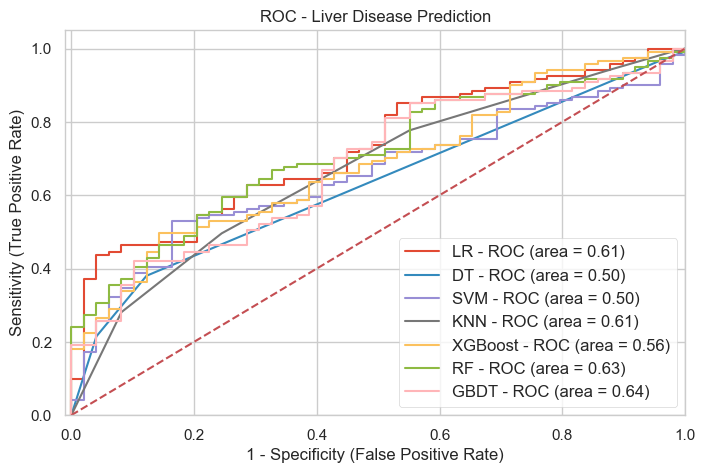

In [118]:
# from sklearn import metrics
# plt.figure(figsize=(8,5))
# models = [
# {
#     'label': 'LR',
#     'model': lr,
# },
# {
#     'label': 'DT',
#     'model': dtc,
# },
# {
#     'label': 'SVM',
#     'model': svc,
# },
# {
#     'label': 'KNN',
#     'model': knn,
# },
# {
#     'label': 'XGBoost',
#     'model': xgb,
# },
# {
#     'label': 'RF',
#     'model': rand_clf,
# },
# {
#     'label': 'GBDT',
#     'model': gbc,
# }
# ]
# for m in models:
#     model = m['model'] 
#     model.fit(X_train, y_train) 
#     y_pred=model.predict(X_test) 
#     fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
#     auc = metrics.roc_auc_score(y_test,model.predict(X_test))
#     plt.plot(fpr1, tpr1, label='%s - ROC (area = %0.2f)' % (m['label'], auc))

# plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([-0.01, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
# plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
# plt.title('ROC - Liver Disease Prediction', fontsize=12)
# plt.legend(loc="lower right", fontsize=12)
# plt.savefig("outputs/roc_liver.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
# plt.show()

from sklearn.impute import SimpleImputer
from sklearn import metrics
import matplotlib.pyplot as plt

# Initialize the imputer to replace missing values with the column mean
imputer = SimpleImputer(strategy='mean')

# Impute the training and test data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Prepare the models
models = [
    {'label': 'LR', 'model': lr},
    {'label': 'DT', 'model': dtc},
    {'label': 'SVM', 'model': svc},
    {'label': 'KNN', 'model': knn},
    {'label': 'XGBoost', 'model': xgb},
    {'label': 'RF', 'model': rand_clf},
    {'label': 'GBDT', 'model': gbc}
]

# Set up the plot
plt.figure(figsize=(8, 5))

# Loop through each model, fit it and plot the ROC curve
for m in models:
    model = m['model']
    
    # Fit the model on the imputed training data
    model.fit(X_train_imputed, y_train) 
    
    # Predict probabilities for the ROC curve
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test_imputed)[:, 1])
    
    # Compute AUC
    auc = metrics.roc_auc_score(y_test, model.predict(X_test_imputed))
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, label='%s - ROC (area = %0.2f)' % (m['label'], auc))

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'r--')

# Set plot limits and labels
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('ROC - Liver Disease Prediction', fontsize=12)
plt.legend(loc="lower right", fontsize=12)

# Save the plot as a JPEG image
plt.savefig("liver.jpeg", format='jpeg', dpi=400, bbox_inches='tight')

# Display the plot
plt.show()


In [119]:
# from sklearn import metrics
# import numpy as np
# import matplotlib.pyplot as plt
# models = [
# {
#     'label': 'LR',
#     'model': lr,
# },
# {
#     'label': 'DT',
#     'model': dtc,
# },
# {
#     'label': 'SVM',
#     'model': svc,
# },
# {
#     'label': 'KNN',
#     'model': knn,
# },
# {
#     'label': 'XGBoost',
#     'model': xgb,
# },
# {
#     'label': 'RF',
#     'model': rand_clf,
# },
# {
#     'label': 'GBDT',
#     'model': gbc,
# }
# ]

# means_roc = []
# means_accuracy = [100*round(lr_acc,4), 100*round(dtc_acc,4), 100*round(svc_acc,4), 100*round(knn_acc,4), 100*round(xgb_acc,4), 
#                   100*round(ran_clf_acc,4), 100*round(gbc_acc,4)]

# for m in models:
#     model = m['model'] 
#     model.fit(X_train, y_train) 
#     y_pred=model.predict(X_test) 
#     fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
#     auc = metrics.roc_auc_score(y_test,model.predict(X_test))
#     auc = 100*round(auc,4)
#     means_roc.append(auc)

# print(means_accuracy)
# print(means_roc)

# # data to plot
# n_groups = 7
# means_accuracy = tuple(means_accuracy)
# means_roc = tuple(means_roc)

# # create plot
# fig, ax = plt.subplots(figsize=(8,5))
# index = np.arange(n_groups)
# bar_width = 0.35
# opacity = 0.8

# rects1 = plt.bar(index, means_accuracy, bar_width,
# alpha=opacity,
# color='mediumpurple',
# label='Accuracy (%)')

# rects2 = plt.bar(index + bar_width, means_roc, bar_width,
# alpha=opacity,
# color='rebeccapurple',
# label='ROC (%)')

# plt.xlim([-1, 8])
# plt.ylim([40, 76])

# plt.title('Performance Evaluation - Liver Disease Prediction', fontsize=12)
# plt.xticks(index, ('   LR', '   DT', '   SVM', '   KNN', 'XGBoost' , '   RF', '   GBDT'), rotation=40, ha='center', fontsize=12)
# plt.legend(loc="upper right", fontsize=10)
# plt.savefig("outputs/PE_liver.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
# plt.show()



ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values